# Initial data analysis and Linear Regression

This assigment is dedicated to Linear regression. By focusing on prediction different features of football players you understand the mathematic behind it and see the usefulness of main data analysis libraries.

**Materials**
- [Documentation](http://docs.scipy.org/doc/) libraries Numpy and SciPy
- [Documentation](http://matplotlib.org/) library Matplotlib 
- [Documentation](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) library Pandas
- [Pandas Cheat Sheet](http://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/)
- [Documentation](http://stanford.edu/~mwaskom/software/seaborn/) library Seaborn 

**Resources**
- In this notebook we will use *FIFA 19 complete player dataset* which is taken from [here](https://www.kaggle.com/karangadiya/fifa19)

## Part 1. Initial data analysis with Pandas

Importing libraries.

In [776]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

%matplotlib inline

Load the data. Table *data.csv* should be in the same directory as this notebook.

In [777]:
data = pd.read_csv("data.csv", index_col='ID')

The first thing you need to do with a dataframe after loading is to look at first few records. This way you can make sure that you have parsed it correctly. Moreover you can get aquainted with the data, look at features and their type (categorical, numerical, text ...).

They you may check whether the data has missing values inside. Depending on the problem type and percentage of missing values you can either fill them with some value or drop columns/rows having null values.

After that you may want to look closer at some features. You can draw a histogram for defining a feature distribution (normal, power or some other). Also with the help of histogram you can find values which are really differ from the rest, we call them **outliers**. Histograms can be plotted by *hist* method of Pandas DataFrame.

**Example 1** Let's look at first 5 rows of data using method *head* for DataFrame data.

In [7]:
data.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
193080,3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
192985,4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Unfortunately number of columns exceeds the maximum visible default value in Pandas. Use the magic line above to remove this restriction.

In [778]:
pd.set_option('display.max_columns', None)

In [5]:
data.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
193080,3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
192985,4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Much better now.

**Example 2** Print total players number and top-10 columns containing the most number of null values.

In [779]:
print(f"Total number of players in dataset {data.shape[0]}")

Total number of players in dataset 18207


In [780]:
from tabulate import tabulate

top = 10
print(tabulate(
    sorted(list(zip(data.columns, data.isnull().sum(), data.isnull().sum() / data.shape[0] * 100)), key=lambda x: -x[2])[:top], 
    headers=['col_name', 'null_cnt', 'null_perc']))

col_name       null_cnt    null_perc
-----------  ----------  -----------
Loaned From       16943      93.0576
LS                 2085      11.4516
ST                 2085      11.4516
RS                 2085      11.4516
LW                 2085      11.4516
LF                 2085      11.4516
CF                 2085      11.4516
RF                 2085      11.4516
RW                 2085      11.4516
LAM                2085      11.4516


**Example 3**. Let's built a histogram of weight distribution in kgs from footbal players data. Follow steps:
- Extract weight value from string.
- Convert *Weight* column to float type.
- Get rid of null values in weight column, use median column value instead of them.
- Convert pounds to kilograms
- Finally use method *hist* for DataFrame *data* with arguments *column=Weight* (we look at this feature distribution)

In [13]:
print(f"Weight column type is '{data['Weight'].dtype}'")

Weight column type is 'object'


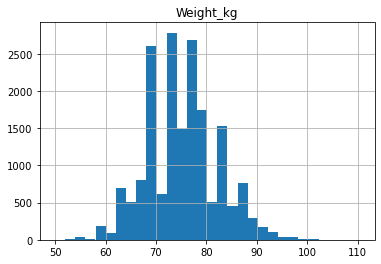

In [781]:
data['Weight'] = data['Weight'].str.extract(r'([0-9]+)lbs').astype(float)
data['Weight'].fillna(data['Weight'].median())
POUND_TO_KILO = 0.454
data['Weight_kg'] = data.apply(lambda row: row['Weight'] * POUND_TO_KILO, axis=1)
data.hist(column='Weight_kg', bins=30)
plt.show()

**Task 1 (1 point)**. Built a histogram of height distribution in *meters* from footbal players data. Remember that height is in format *feet* '*inches*.  Instead of filling null values with some constant just drop them. Use *.dropna* for specified column.

In [782]:
data.dropna(subset=['Height'], how='all', inplace=True)

In [783]:
data['Height_m']= data.apply(lambda row: (float((row['Height']).split("'")[0])*30.48+float((row['Height']).split("'")[1])*2.54)/100, axis=1)

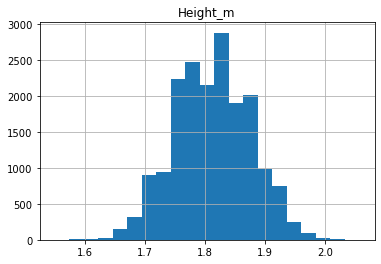

In [784]:
data.hist(column='Height_m', bins=21)
plt.show()

Effective way to visualize the relatioship between two features is to draw a simple _scatter plot_. The position of each dot on the horizontal and vertical axis indicates values for an individual data point.

**Example 4.** Visualize the dependence of _Strength_  on _Weight_kg_.

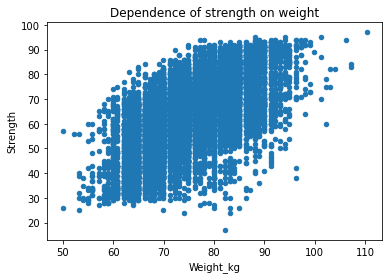

In [785]:
data.plot.scatter(x='Weight_kg', y='Strength')
plt.title('Dependence of strength on weight')
plt.show()

One more effective way of initial data analysis is to plot pairwise feature dependencies. That simply combines already considered Scatter plot and histogram. We create $m \times m$ plots (_m_ is number of features) where pictures on diagonal represent **histograms** and outside the diagonal **scatter_matrix**. That can be done with the help of _scatter_matrix_ Pandas DataFrame method or _pairplot_ in Seaborn.

**Example 5.**
Illustrate pairwise dependencies between _ShortPassing_, _Dribbling_, _BallControl_ and _Strength_ features of footbal players.

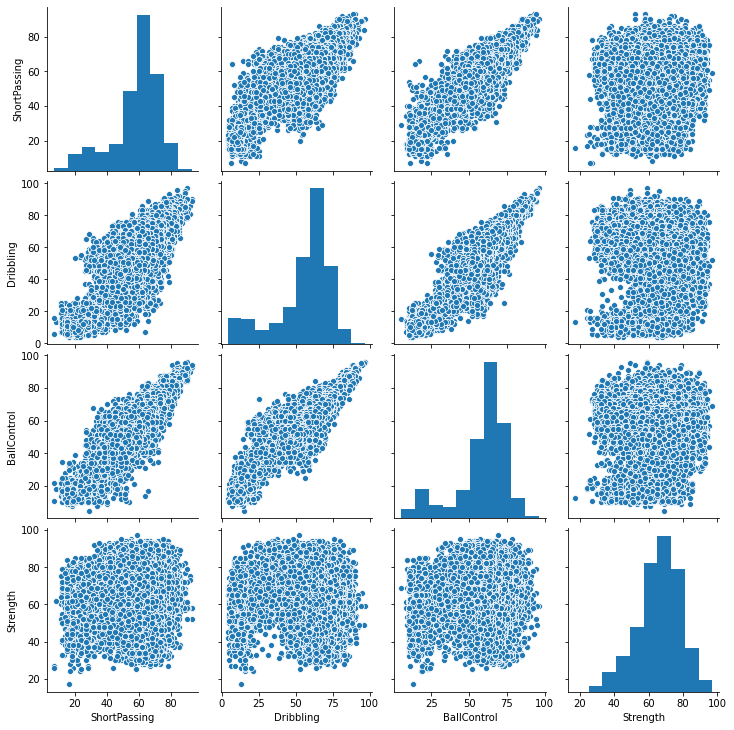

In [786]:
sns.pairplot(data[['ShortPassing', 'Dribbling', 'BallControl', 'Strength']])

Histograms and scatterplots are good for continuous (numerical) features. Distribution of data by categorical features (that have fixed number of possible values) can be represented with **bar charts**.

**Example 6.** Show distribution of players by age groups (under 20 yo. _young_, between 20-30 _mature_, over 30 yo. _masters_)

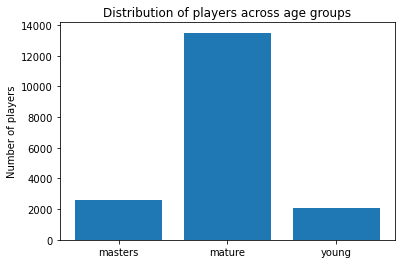

In [787]:
data['age_group'] = data.apply(lambda x: 'young' if x['Age'] < 20 else 'mature' if x['Age'] <= 30 else 'masters', axis=1)
distr = data.groupby('age_group').count().max(axis=1)

plt.bar(distr.index, distr.values)
plt.ylabel('Number of players')
plt.title('Distribution of players across age groups')
plt.show()

Really often it is necessary to explore the distribution of some numerical feature based on the value of categorical one. Here comes the _boxplot_ of Seaborn library, which can show statistics of numerical features (mean, quantiles) by different value of categorical feature. Boxplot can also help to detect **outliers** - values that singificantly differ from the rest. More detailed explanation [here](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51).

**Example 7.** Show _SprintSpeed_ statistics across different age groups.

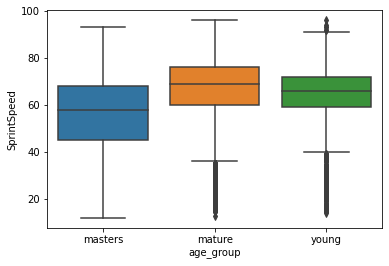

In [788]:
sns.boxplot(x='age_group', y='SprintSpeed', data=data)

## Part 2. Minimizing Mean Squared Error. Linear Regression

We are going to predict target numerical variable $y$ for _n_ samples with the help of $x_1, x_2, ..., x_m$ _m_ features under the assumption of _liner dependence_ existence between features and target, i.e.
$$\hat{y} = w_0 + w_1 * x_1 + w_2 * x_2 + ... + w_m * x_m$$
so that Mean Squarred Error between $y$ and $\hat{y}$ was the lowest possible
$$MSE = \frac{1}{n}\sum_{i=1}^n {(y_i - \hat{y})}^2 -> min_{w_0, w_1, w_2, ...w_m}$$
where $w_0$ is "free" weight component called **intercept** and $(w_1, w_2, ... w_n)$ is a **vector of coefficients**.

 ### Part 2.1 Linear Regression with one variable

Just to understand the basic principles let's try to predict _BallControl_ score based on _Dribbling_ score for every player. Simple Linear Regression with one feature.
$$BallControl = w_0 + w_1 * Dribbling$$

We are going to do real data science, aren't we? So let us split the avaliable data into train and test samples. We let our model see only the train data, then we can measure it's quality on test sample.

In [789]:
from sklearn.model_selection import train_test_split

data.fillna({'BallControl': data['BallControl'].mean(), 'Dribbling': data['Dribbling'].mean()}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data['BallControl'].values, data['Dribbling'].values, train_size=0.8)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

To illustrate the approach let's use Ridge model from sklearn with _regularization_ param alpha=0. What does it mean and what it if for we will find out later on in this course. But for now I require avoiding regularization by setting regularization param to zero.

In [790]:
from sklearn.linear_model import Ridge

lr = Ridge(alpha=0)
lr.fit(X=X_train, y=y_train)

Ridge(alpha=0)

In [791]:
print(f'w_0 = {lr.intercept_}, w_1 = {lr.coef_[0]}')

w_0 = -6.922114081266486, w_1 = 1.0663037663029493


In [792]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

Right now we have predictions for train and test samples. How about measure the quality of the model?

**Task 2 (0.5 point).** Write your own function for MSE calculation using the formula above. Calculate train and test MSE, compare to built-in method (_sklearn.metrics.mean_squared_error_)

In [793]:
def mse(y_true, y_pred):
    # your code here
    error =np.mean((y_true-y_pred)**2) 
    return error

In [794]:
from sklearn.metrics import mean_squared_error

assert mean_squared_error(y_train, y_pred_train) == mse(y_train, y_pred_train)
assert mean_squared_error(y_test, y_pred_test) == mse(y_test, y_pred_test)

In [795]:
print(f'Train MSE {mse(y_train, y_pred_train)}, test MSE {mse(y_test, y_pred_test)}')

Train MSE 42.64451535927702, test MSE 41.109633482647794


**Task 3 (1.5 points).** Visualize the dependence of _BallControl_ predictions and real _BallControl_ score on _Dribbling_ score.

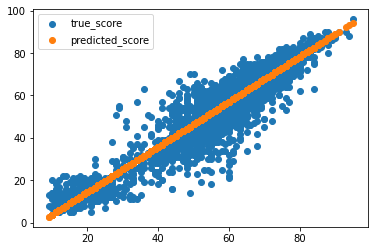

In [796]:
scatter1=plt.scatter(X_test,y_test)
scatter2=plt.scatter(X_test,y_pred_test)
plt.legend((scatter1,scatter2),('true_score','predicted_score'),loc="upper left")
plt.show()

### Part 2.2 Linear regression with many variables

**Task 4 (5 points).** Implement you own Linear Regression class for any number of input features and settable boolean parameter *fit_intercept*.

In this task you will work with _optimize_ module of [_scipy_](https://docs.scipy.org/doc/scipy/reference/) open-source library for mathematics, science, and engineering. You will need a function [_least_squares_](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html) that finds a coefficients to linear regression by minimizing the sum of the squares of the residuals (which is equivalent to MSE minimizing). More information about least squares approach [here](https://en.wikipedia.org/wiki/Least_squares). <br><br>
Even though this function has many parameters, you need only a few of them to complete the task (the rest will be filled in with default values automatically).
- **fun** computes a vector of residuals given weights, features and target, we provide you a function template _compute_residuals_
- **x0** this is an initial weights vector. You can either pass a vector of zeros[n_features] or fill in randomly.
- **args** are fixed arguments to _fun_ function (which we are not going to optimize). In that particular case you will need to pass X and y.


You can access optimized weights by accessing the field **.x** of object which returns by this function.

In [797]:
def compute_residuals(w, X, y):
    """
    Compute residuals when predicting y_hat as matrix product of X and transposed w
    :param X: training features, numpy.ndarray: float64[num_samples, num_features]
    :param y: training target, numpy.ndarray: float64[num_samples]
    :returns: vector of residuals (y_i_hat - y_i) for each sample_i in X
    
    """
    # Your code here
    residuals =np.dot(X, w.T)-y
    return residuals

In [798]:
from scipy.optimize import least_squares

In [799]:
from sklearn.base import BaseEstimator
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from scipy.optimize import least_squares

class LinearRegression(BaseEstimator):
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
    
    def fit(self, X, y):
        """
        fit model weights given input features and target
        :param X: training features, numpy.ndarray: numeric[num_samples, num_features]
        :param y: training target, numpy.ndarray: numeric[num_samples]
        :returns: linear predictor with fitted weights so that train MSE is the lowest possible
        :note: weights: numpy.ndarray: float64[num_features] stored as class field

        """
        
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        
        # Save train data information. Necessary for following the uniform API
        self.X_ = X
        self.y_ = y
        self.n_features_in_ = X.shape[1]
        
        # Copy arrays and cast them to uniform type
        X_train = X.astype('float64')
        y_train = y.astype('float64')
        
        # Add dummy column of ones to X_train if we want to train an intercept - last component of future weight vector
        if self.fit_intercept:
            X_train = np.column_stack((X_train, np.ones(X_train.shape[0])))
        
        
        # Your code here.
        # Just follow the suggested steps: create initial weights vector,
        # apply least_squares optimizer passing the parameters described above
        # and finally extract optimized weights.
        # Remember: you need to distinguish coefficients from intercept when fit_intercept=True
        #weight= np.dot(np.dot(np.linalg.inv(np.dot(X_train.T,X_train)), X_train.T), y_train)
        weight=np.random.rand(X_train.shape[1])
        weight=least_squares(fun=compute_residuals, x0=weight,args=(X_train, y_train)).x
        if self.fit_intercept:
            self.coef_ = weight[:-1]
            self.intercept_ = weight[-1]
        else:
            self.coef_ = weight
            self.intercept_ = 0
        
        # Return the classifier
        return self
        
    def predict(self, X):
        # Check is fit had been called
        check_is_fitted(self)
        
        # Input validation
        X = check_array(X)
        
        return X.dot(self.coef_) + self.intercept_

In [800]:
#Testing area
from sklearn.utils.estimator_checks import check_estimator
from sklearn.linear_model import Ridge

lr = LinearRegression()
ridge = Ridge(alpha=0)
lr_no_intercept = LinearRegression(fit_intercept=False)
ridge_no_intercept = Ridge(alpha=0, fit_intercept=False)

#Check compatibility with Sklearn framework and apply some spesific internal tests
check_estimator(lr)
check_estimator(lr_no_intercept)

#Compare model accuracy with Ridge(0) from Sklearn
data.fillna({'BallControl': data['BallControl'].mean()
             , 'Dribbling': data['Dribbling'].mean()
             , 'Strength': data['Strength'].mean()}, inplace=True)
X_sample, y_sample = data[['Dribbling', 'Strength']], data['BallControl']
lr.fit(X_sample, y_sample)
ridge.fit(X_sample, y_sample)
assert np.allclose(lr.predict(X_sample), ridge.predict(X_sample), rtol=1e-03), "Your model with intercept not accurate enough!"
lr_no_intercept.fit(X_sample, y_sample)
ridge_no_intercept.fit(X_sample, y_sample)
assert np.allclose(lr_no_intercept.predict(X_sample), ridge_no_intercept.predict(X_sample), rtol=1e-03), "Your model without intercept not accurate enough!"

Let's add more features in order to predict Dribbling score more accurately.

In [801]:
features = ['BallControl', 'ShortPassing', 'Strength', 'Weight', 'Weight_kg']
target = 'Dribbling'
for feat in features:
    data.fillna({feat: data[feat].mean()}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data[features].values, data[target].values, train_size=0.8, random_state=2)

In [802]:
lr = Ridge(0)
lr.fit(X=X_train, y=y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print(f'Train MSE {mse(y_train, y_pred_train)}, test MSE {mse(y_test, y_pred_test)}')

Train MSE 37.01132485812604, test MSE 37.09804668214708


C:\Users\gabar\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.21816e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [803]:
print(f'w_0 = {lr.intercept_}, w_1, w_2, w_3, w_4, w_5 = {lr.coef_}')

w_0 = 11.939009437253105, w_1, w_2, w_3, w_4, w_5 = [  1.09606899  -0.05070967  -0.12911552 -14.58309881  32.        ]


That is not ok, two last weight components are too large, and they vary depending on the run! Although the result seems better our model would behave unexpectadly to the patterns in data it has never seen! Large weights and weights instability are the sign of [**overfitting**](https://en.wikipedia.org/wiki/Overfitting).  <br><br>
According to the definition it is "_the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably_". But what does it actually mean?

Assume that we have a player whose weight in kg was calculated with some tiny error, let's say +=1g.

In [804]:
player = data[features + [target]].iloc[0:2]
player['Predicted_dribbling'] = lr.predict(player[features].values)
player.head()

,BallControl,ShortPassing,Strength,Weight,Weight_kg,Dribbling,Predicted_dribbling
ID,,,,,,,
158023,96.0,90.0,59.0,159.0,72.186,97.0,96.219236
20801,94.0,81.0,79.0,183.0,83.082,88.0,90.578803


Predictions are pretty good if the data is _pure_. Let's add some noise to _Weight_kg_ feature:

In [805]:
player['Weight_kg'] = player['Weight_kg'] + [-0.001, 0.001]
player['Predicted_dribbling_with_error'] = lr.predict(player[features].values)
player.head()

,BallControl,ShortPassing,Strength,Weight,Weight_kg,Dribbling,Predicted_dribbling,Predicted_dribbling_with_error
ID,,,,,,,,
158023,96.0,90.0,59.0,159.0,72.185,97.0,96.219236,96.187236
20801,94.0,81.0,79.0,183.0,83.083,88.0,90.578803,90.610803


Predicted dribbling value has changed significantly! Look at how this tiny **1g** error leads to extremly big or small dribbling!

The reason behind it strange unstable behaviour is **collinearity** between Weight and Weight_kg features, what means that Weight_kg can be linearly predicted from Weight. As a matter of fact they represent the same essense but in different scales. <br><br>
**Multicollinearity** describes a more general case, when one feature can be predicted by linear combination of some other features.<br><br>
Collinearity is really close related to **correlation** - degree to which a pair of variables are linearly related. Collinearity origins from Linear Algebra and Geometry whereas Correlation is a term from Statistics. Anyway all of this three terms refer to **linearly dependent features**, which is really bad for Linear Models.

But why it is so bad? The main reason is that Linear Regression tries to capture the contribution of each feature to target _independently_, which obviously is not possible in terms of feature multicolliearity.<br><br>
There are a whole bunch of really interesting thoughts that can help to capture the intuition behind it [here](https://stats.stackexchange.com/questions/1149/is-there-an-intuitive-explanation-why-multicollinearity-is-a-problem-in-linear-r). I'd citate one of the examples provided.<br><br>
_Assume that two people collaborated and accomplished scientific discovery. It is easy to tell their unique contributions (who did what) when two are totally different persons (one is theory guy and the other is good at experiment), while it is difficult to distinguish their unique influences (coefficients in regression) when they are twins acting similarly._

There are a few approaches how to prevent overfitting and overcome multicollinearity.
- Drop features
- Combine features
- Regularization


Regularization is something we are going to speak about in the next modules. Combining features is problem-specific and could easily trigger a _holy_war_ due to ambiguity of approaches. Let's focus on simpliest - drop one of the features from the correlated pair.<br>
At first we need to define those pairs of features, **correlation matrix** comes to rescue! Each cell in the table shows the correlation between two variables. We use dataframe in-built method _corr_ in combination with seaborn _heatmap_.

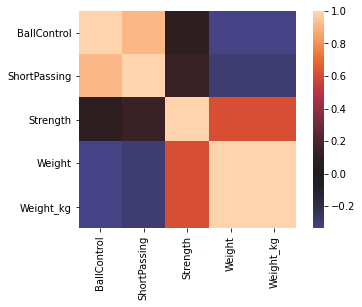

In [806]:
from seaborn import heatmap

heatmap(data[features].corr(method='pearson'), center=0, square=True)
plt.show()

In [807]:
features = ['BallControl', 'ShortPassing', 'Strength', 'Weight_kg']
X_train, X_test, y_train, y_test = train_test_split(data[features].values, data[target].values, train_size=0.8, random_state=2)

lr = LinearRegression()
lr.fit(X=X_train, y=y_train)

player['Predicted_dribbling_with_error'] = lr.predict(player[features].values)
player.head()

,BallControl,ShortPassing,Strength,Weight,Weight_kg,Dribbling,Predicted_dribbling,Predicted_dribbling_with_error
ID,,,,,,,,
158023,96.0,90.0,59.0,159.0,72.185,97.0,96.219236,96.219357
20801,94.0,81.0,79.0,183.0,83.083,88.0,90.578803,90.578681


### Part 2.3 Putting all together

**Task 3 (up to 5 points).** Build a Linear Regression model for _Value_ prediction for every football player and validate it. Steps you need to follow:
- Extract float number from _Value_ field in DataFrame
- Сhoose more features that you expect to influence on player _Value_ (at least 10)
- Plot correlation matrix. Drop features that are highly correlated with each other (corr > 0.9) one by one until no correlated pairs left. _Hint_: you may reuse code from Task_9 in HW_1 for automatic correlated pairs selection.
- Split data into train/test with some proportion
- Train a model on train dataset, make predictions both for train and test.
- Measure the quality on train and test

### Extract float number from Value field in DataFrame

In [808]:
set([i[-1] for i in list(data.Value.values)])

{'0', 'K', 'M'}

In [809]:
data["Value_new"]=np.array([float(x[1:-1]) if x[-1]== 'M' else float(x[1:-1])/1000 if x[-1]=='K' else float(x[1:]) for x in list(data.Value.values)])

Text(0.5, 1.0, 'Boxplot of Values')

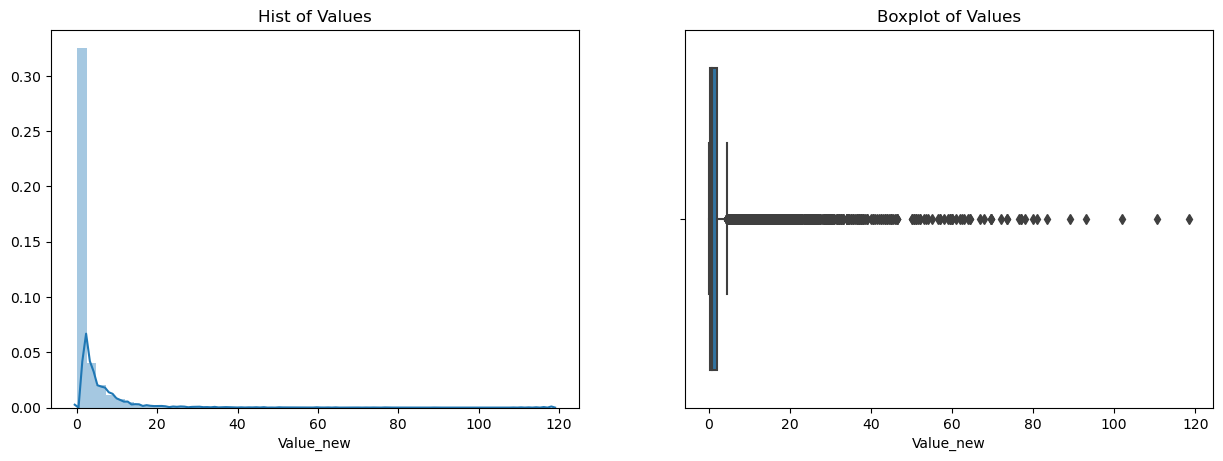

In [810]:
import seaborn as sns
fig,axis=plt.subplots(1,2,figsize=(15,5),dpi=100)
sns.boxplot(data["Value_new"],ax=axis[1])
sns.distplot(data["Value_new"],ax=axis[0])
axis[0].set_title('Hist of Values')
axis[1].set_title('Boxplot of Values')


In [811]:
data['Value_new'].describe()

count    18159.000000
mean         2.416131
std          5.601319
min          0.000000
25%          0.300000
50%          0.675000
75%          2.000000
max        118.500000
Name: Value_new, dtype: float64

### Сhoose more features that you expect to influence on player Value (at least 10)

In [1039]:
data.dtypes.value_counts()

object     45
float64    42
int64       5
dtype: int64

#### Analyze numeric features

In [1040]:
data.select_dtypes(['int64','float64']).isnull().sum().sort_values(ascending = False).head(10)

Jersey Number    12
Value_new         0
Finishing         0
Acceleration      0
BallControl       0
LongPassing       0
FKAccuracy        0
Curve             0
Dribbling         0
Volleys           0
dtype: int64

In [1041]:
features=data.select_dtypes(['int64','float64'])
target=features['Value_new']
features.drop(['Unnamed: 0','Weight','Jersey Number','Value_new'],axis=1,inplace=True)

C:\Users\gabar\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [1042]:
features.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Weight_kg,Height_m
count,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122529,66.249904,71.319126,1597.903959,1.113222,2.947299,2.361308,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,75.354524,1.812576
std,4.670568,6.914613,6.134420,272.862270,0.394031,0.660456,0.756164,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,7.079378,0.067301
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,49.940000,1.549400
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,69.916000,1.752600
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,74.910000,1.803400
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,79.904000,1.854200
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000,110.32200

#### Correlation with target ( First example)

In [1043]:
corr_main=[]
for i in features.columns:
    if abs(features[i].corr(target))>0.25:
        corr_main.append(i)
print(f'important features with values is {corr_main}')

important features with values is ['Overall', 'Potential', 'Special', 'International Reputation', 'Skill Moves', 'Finishing', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Reactions', 'ShotPower', 'LongShots', 'Positioning', 'Vision', 'Composure']


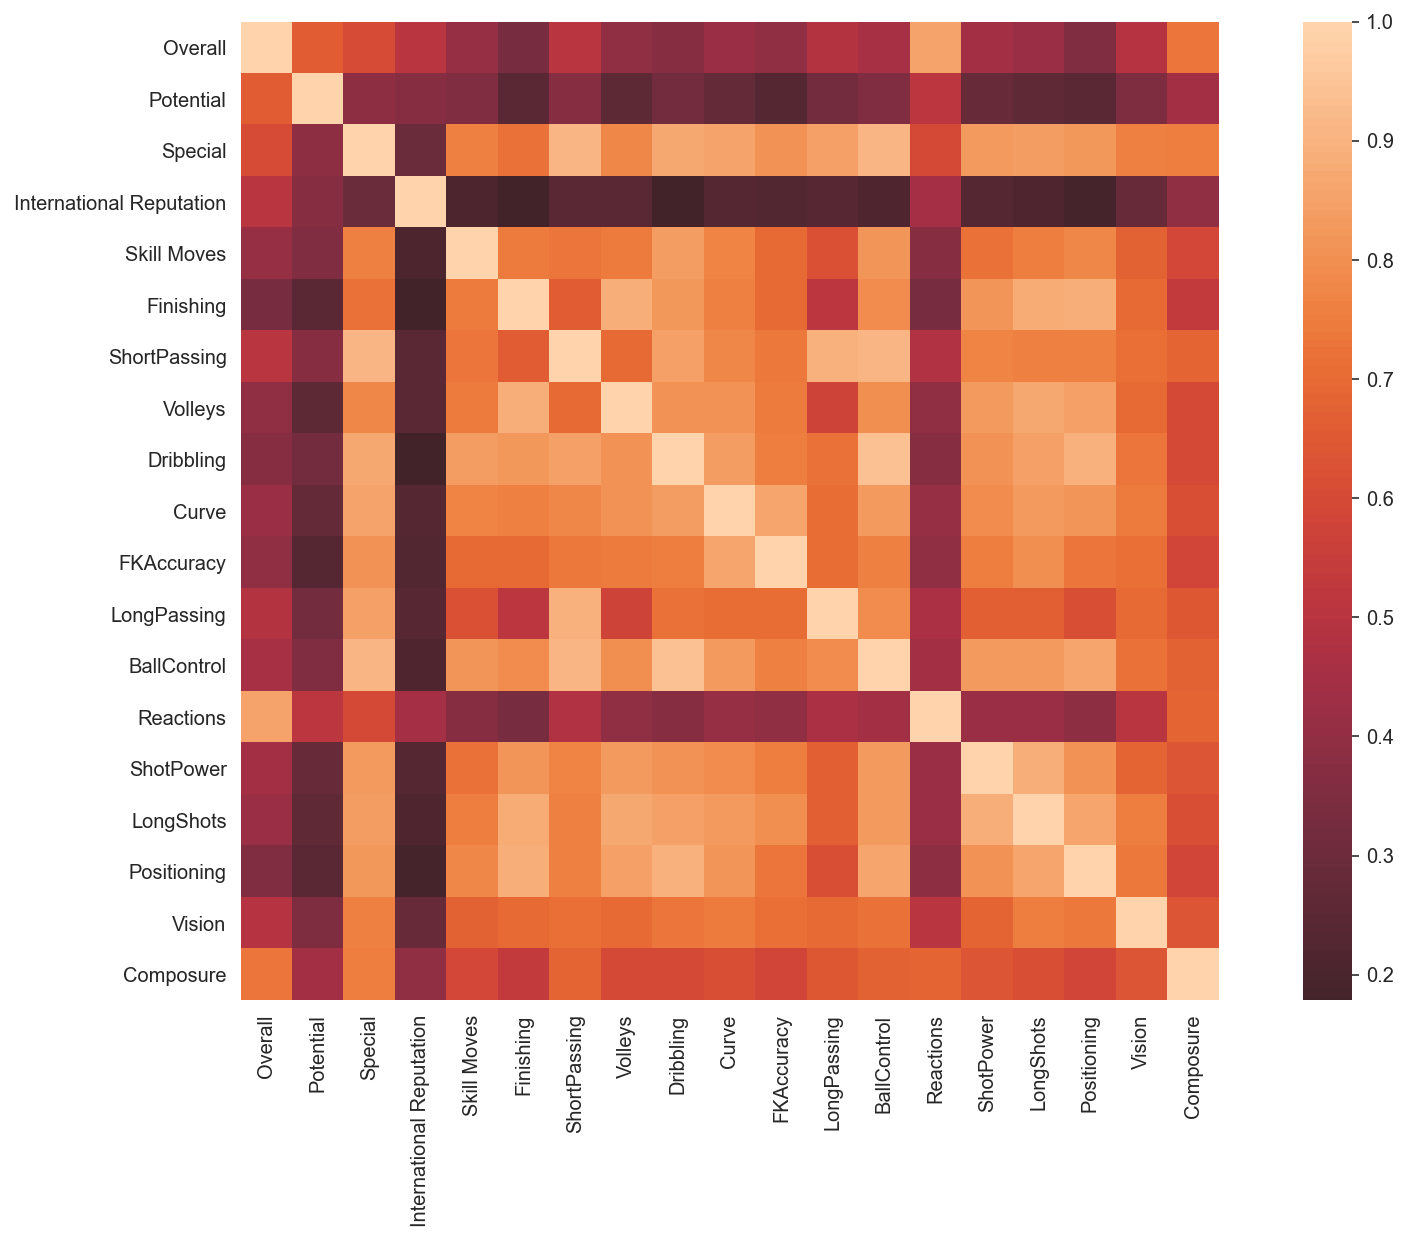

In [1044]:
heatmap(features[corr_main].corr(method='pearson'), center=0, square=True)
plt.show()

In [1045]:
corr_n=features[corr_main].corr()
corr_n.loc[:,:] =  np.tril(corr_n, k=-1)
corr_n

,Overall,Potential,Special,International Reputation,Skill Moves,Finishing,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Reactions,ShotPower,LongShots,Positioning,Vision,Composure
Overall,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
Potential,0.661180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
Special,0.607236,0.384598,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
International Reputation,0.499491,0.372993,0.292208,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
Skill Moves,0.414463,0.354290,0.763412,0.208153,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
Finishing,0.332515,0.243355,0.724244,0.178373,0.743439,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
ShortPassing,0.502550,0.369189,0.906729,0.242803,0.730363,0.661830,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
Volleys,0.391338,0.254906,0.773974,0.243089,0.745077,0.882675,0.698309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
Dribbling,0.372426,0.315019,0.874274,0.179041,0.839757,0.824337,0.843722,0.809639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
Curve,0.419491,0.279944,0.851900,0.233681,0.771052,0.759229,0.775398,0.807285,0.842652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0


In [1046]:
set_corr=set ()
result=[]
for i in corr_n:
    list_corr=(corr_n[i][corr_n[i]>=0.9].index.to_list())
    if  list_corr and i not in set_corr:
        set_corr.update(set(list_corr))
        list_corr.append(i)
        result.append(list_corr)
result

[['ShortPassing', 'BallControl', 'Special'], ['BallControl', 'Dribbling']]

In [1047]:
corr_main=list(list(set(corr_main)-set(['BallControl','Special'])))


In [1048]:
X_train, X_test, y_train, y_test = train_test_split(features[corr_main].values, target.values, test_size=0.33, random_state=42)

In [1049]:
clf_corr_main = Ridge(alpha=0,max_iter=1000)
clf_corr_main.fit(X_train, y_train)

Ridge(alpha=0, max_iter=1000)

In [1050]:
clf_corr_main.score(X_train, y_train)

0.5930663291954235

In [1051]:
clf_corr_main.score(X_test, y_test)

0.5807949074160625

In [1052]:
features[corr_main].columns

Index(['Finishing', 'Reactions', 'International Reputation', 'Potential',
       'ShotPower', 'Composure', 'Positioning', 'Dribbling', 'Skill Moves',
       'LongPassing', 'LongShots', 'Vision', 'Volleys', 'FKAccuracy', 'Curve',
       'Overall', 'ShortPassing'],
      dtype='object')

Conclusion: In this prediction we at first take features that has most correlation with target,then we remove multicollinearity between this features, we get prediction on train 0.59, on test 0.58.
Features:
- 'Finishing', 'Reactions', 'International Reputation', 'Potential','ShotPower', 'Composure', 'Positioning', 'Dribbling', 'Skill Moves','LongPassing', 'LongShots', 'Vision', 'Volleys', 'FKAccuracy', 'Curve','Overall', 'ShortPassing'

In [1053]:
coef_dict = {}
for coef, feat in zip(abs(clf_corr_main.coef_),corr_main):
    coef_dict[feat] = coef
coef_dict=dict(sorted(coef_dict.items(), key=lambda item: item[1],reverse=True))
coef_dict

{'International Reputation': 6.073468654402705,
 'Skill Moves': 0.5859478017328269,
 'Potential': 0.22056077526236187,
 'Overall': 0.18609967292652743,
 'Reactions': 0.027202687432943237,
 'Finishing': 0.025829425609264687,
 'Composure': 0.025365198865935395,
 'ShotPower': 0.02346653904320834,
 'Curve': 0.00888612657733035,
 'Vision': 0.007965233623241504,
 'Dribbling': 0.007362088823648872,
 'Positioning': 0.007114154868949952,
 'LongShots': 0.007038700737461166,
 'LongPassing': 0.006833074722263955,
 'ShortPassing': 0.004517681283955003,
 'FKAccuracy': 0.0038134779967158184,
 'Volleys': 0.0027216248939839495}

mean Residuals -0.06155409922095198


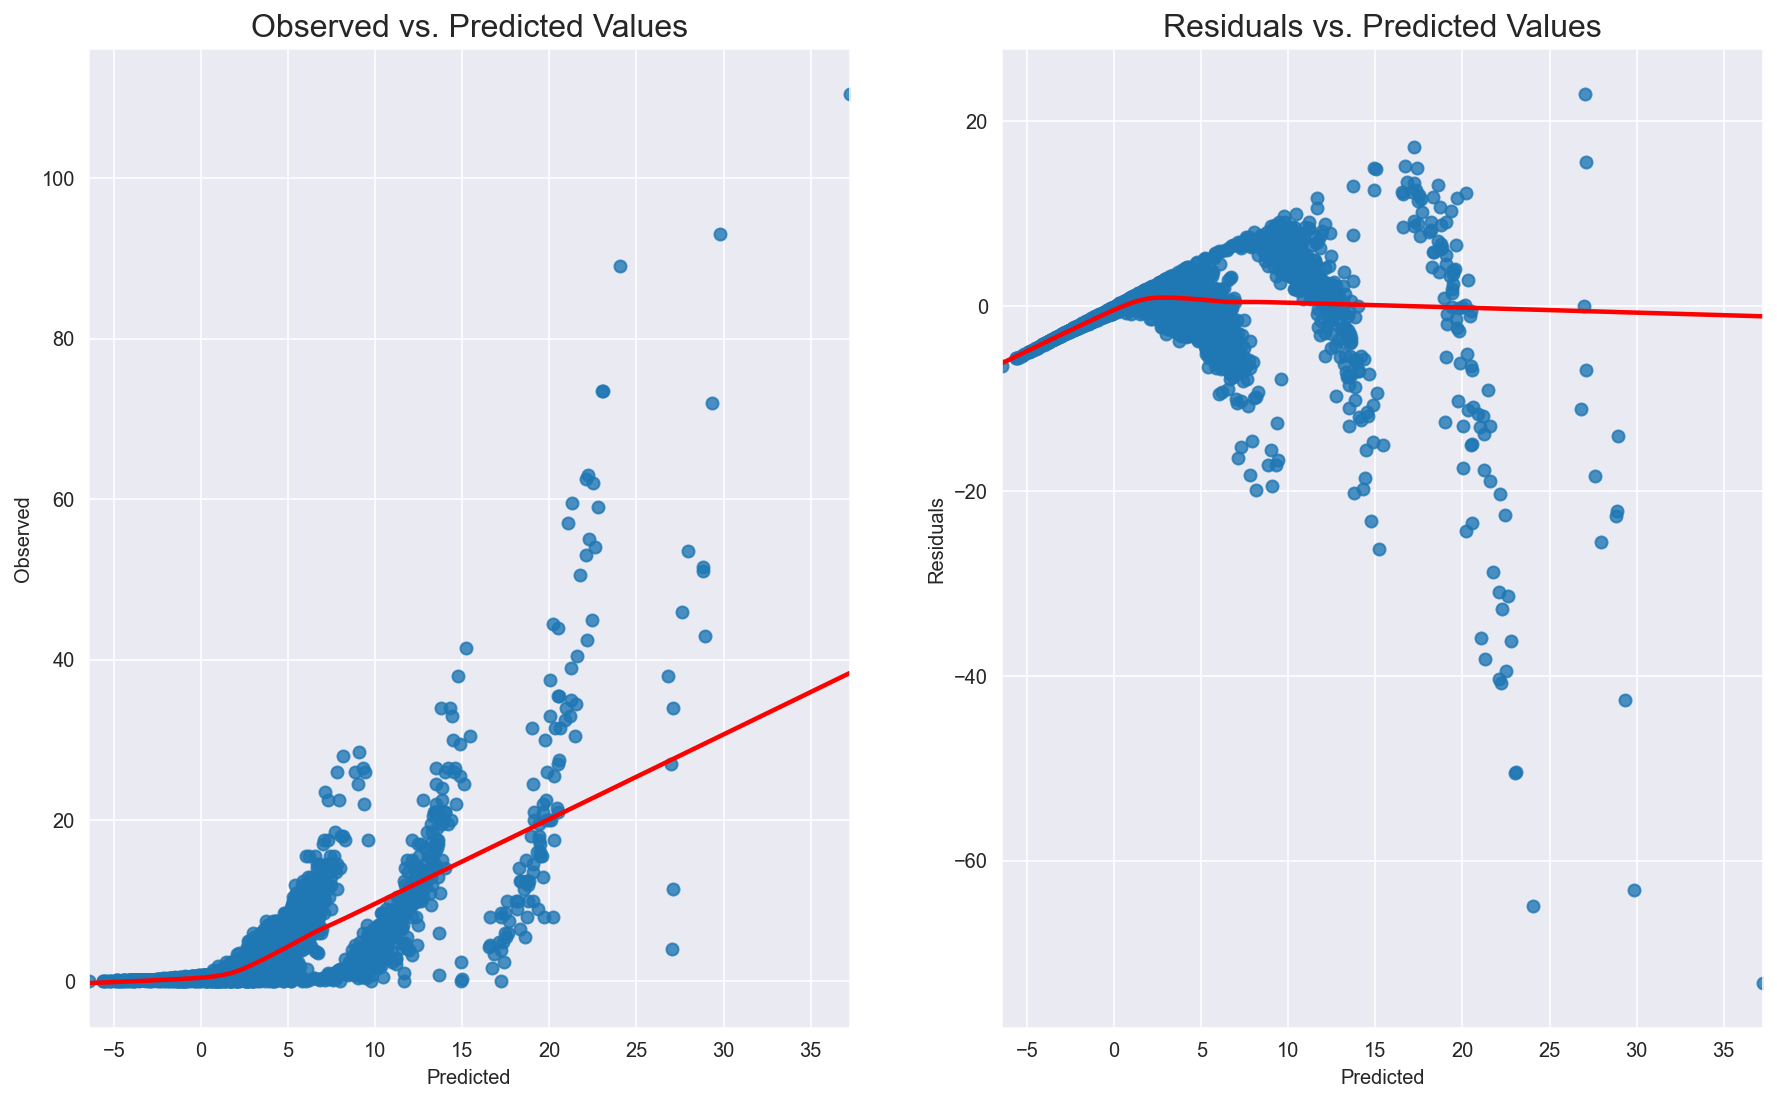

In [1054]:
def linearity_test(model,X , y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict(X)
    resids = fitted_vals-y

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    print(f"mean Residuals {np.mean(resids)}")
    
linearity_test(clf_corr_main,X_test, y_test)    

Если мы проверим требования для линейной регрессии. То видим что они не соблюдаются. Нет линейной зависимости между предсказанной переменной Values и независимыми переменными. Остатки также распределены с каким то паттерном . Соответственно второе предположение тоже не соблюдается. 

### Second example

In [1055]:
corr_matrix = features.corr(method='pearson').abs()
corr_matrix=pd.DataFrame(corr_matrix.unstack().sort_values(ascending=False).drop_duplicates().reset_index())
corr_matrix=corr_matrix[corr_matrix.iloc[:,2]<1]
corr_matrix.columns=['features1','features2','correlation']
corr_matrix=corr_matrix[corr_matrix.correlation>=0.9]

In [1056]:
corr_matrix

,features1,features2,correlation
1,StandingTackle,SlidingTackle,0.974659
2,GKReflexes,GKDiving,0.973320
3,GKDiving,GKHandling,0.970280
4,GKReflexes,GKHandling,0.970264
5,GKPositioning,GKReflexes,0.970130
6,GKPositioning,GKDiving,0.969864
7,GKPositioning,GKHandling,0.969408
8,GKKicking,GKReflexes,0.966337
9,GKDiving,GKKicking,0.965685
10,GKHandling,GKKicking,0.965239


In [1057]:
res=[]
for i in range (corr_matrix.shape[0]):
    if (corr_matrix.iloc[i]['features1'] not in res)and(corr_matrix.iloc[i]['features2'] not in  res):
        res.append(corr_matrix.iloc[i]['features1'])
features_second=features.drop(res,axis=1)

In [1058]:
res

['StandingTackle',
 'GKReflexes',
 'GKDiving',
 'GKPositioning',
 'GKHandling',
 'Dribbling',
 'Interceptions',
 'Acceleration',
 'Special',
 'BallControl']

In [1059]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_second.values, target.values, test_size=0.33, random_state=42)

In [1060]:
from sklearn.linear_model import Ridge
clf_second = Ridge(alpha=0, max_iter=1000)
clf_second.fit(X_train, y_train)


Ridge(alpha=0, max_iter=1000)

In [1061]:
clf_second.score(X_train,y_train)

0.6201603745298641

In [1062]:
clf_second.score(X_test,y_test)

0.6081931474004414

In [1063]:
coef_dict_second = {}
for coef, feat in zip(abs(clf_second.coef_),list(features_second.columns)):
    coef_dict_second[feat] = coef
coef_dict_second=dict(sorted(coef_dict_second.items(), key=lambda item: item[1],reverse=True))
coef_dict_second

{'International Reputation': 6.482256285314466,
 'Overall': 0.43906007977443867,
 'Height_m': 0.4064280263368356,
 'Age': 0.3830243653740391,
 'Skill Moves': 0.30716292688457336,
 'Weak Foot': 0.05884063356279828,
 'Potential': 0.057791250871027156,
 'Reactions': 0.042876831873759944,
 'Finishing': 0.024094767035070352,
 'Stamina': 0.020404161452694226,
 'ShotPower': 0.019836470267994042,
 'Penalties': 0.01673898441368485,
 'FKAccuracy': 0.01626032779865936,
 'Agility': 0.014172708889286637,
 'Crossing': 0.012893758692162046,
 'SlidingTackle': 0.009360897958711409,
 'LongShots': 0.009310991642635984,
 'Weight_kg': 0.008980278622763915,
 'Vision': 0.0076211210114314224,
 'HeadingAccuracy': 0.006991561329575688,
 'Jumping': 0.006922401253385747,
 'Balance': 0.006437527812613258,
 'Curve': 0.006202189073938008,
 'GKKicking': 0.00607638408514229,
 'ShortPassing': 0.005204611748783517,
 'SprintSpeed': 0.004853554486570154,
 'LongPassing': 0.004662582420134059,
 'Volleys': 0.0044957454139529

mean Residuals -0.06161696884270032


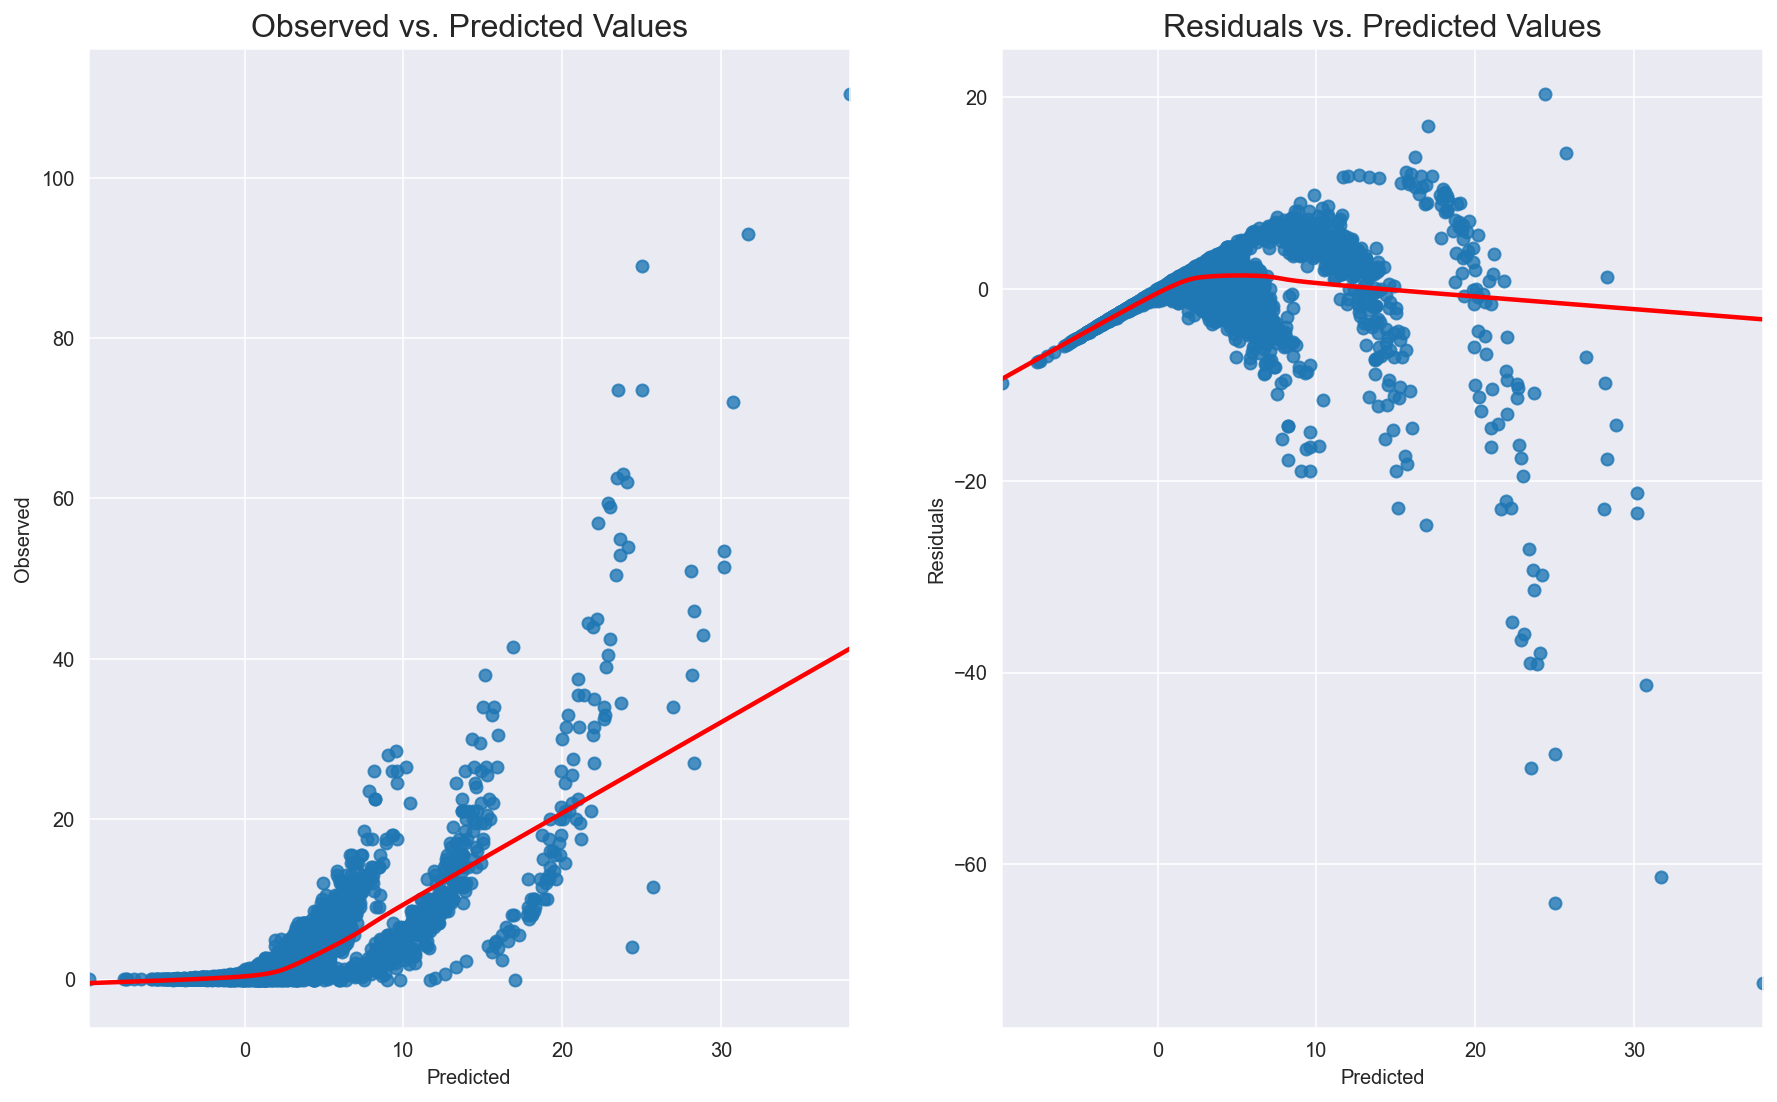

In [1064]:
linearity_test(clf_second,X_test, y_test)    

# Вывод

В последнем задание для предикта зависисимой переменной, В первом случае я отбирала признаки по такому алгоритму:
    Я взяла числовые признаки у которых корреляция с зависимой переменной больше 0.25, внутри зависимых признаков исключила корреляцию(т.е удалила признаки с корреляцией больше 0.9). Предсказанные значение на train 0.59 на test 0.58, В коэффициентах нет слишком больших значения. Поэтому можно сказать что модель не переобучается .
    Во втором случае я взяла все числовые признаки, убрала мультиколлинеарность. Значение на train 0.62, на test 0.61. Разбежки в коэффициентах тоже нету. Переобучаемость на данном этапе не обнаружила. 
    В первом и во стором случае отбирала топ 10 признаком с наибольшими коэффициентами , на результат в тестовых и трэйнинговых выборках не повлияло.
    Есть интересный момент, что если проверить  требовния для использования линейной регрессии, то сразу видно что нарушаются два требования : линейная зависимость , и гомоскедастичность.
    Пути решения: делать нелинейные преобразования зависимой и не зависимых переменных или использовать не линейную модель.
    